# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

# Part 1

## 1-A. generating XOR dataset

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD  #Stochastic Gradient Descent

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

In [3]:
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

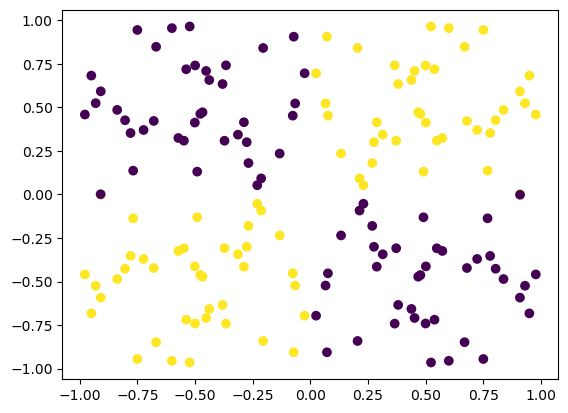

In [4]:
plt.scatter(*zip(*X), c=y)

## 1-B. Train Neural Network with 2 neurons

In [5]:
num_layers = [1,2,3,4,5]

# set SGD for optimizer
sgd = SGD(learning_rate=0.1)

In [6]:
# define 'scores1_2' for scores 2-neuron model in assignment 1
scores1_2 = []

# define 'layer_size' to designate the number of neurons
layer_size = 2

for num_layer in num_layers:

    # define 'model' as sequential model
    model = Sequential()
    
    # add input layer (input dimension =2)
    model.add(Dense(2, input_dim=2, activation='tanh'))
    
    # add hiddel layers for the designated number of layers (num_layer)
    for _ in range(num_layer):
        model.add(Dense(layer_size, activation='tanh'))
    
    # add output layer
    # I set sigmoid function for activation, because the model did not fit well when using 'tanh' (loss value stuck above 0.5)
    model.add(Dense(1, activation='sigmoid'))
    
    # complie and fit the model
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    model.fit(X, y, batch_size=1, epochs=400)
    
    # calculate score for each case and add scores
    score = model.evaluate(X, y)
    scores1_2.append(score)
    
    # print length of layers and scores to check if the model is well generated
    print(len(model.layers), scores1_2)



Epoch 1/400

160/160 [==============================] - 1s 2ms/step - loss: 0.7052
Epoch 2/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7008
Epoch 3/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6988
Epoch 4/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6968
Epoch 5/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6947
Epoch 6/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6928
Epoch 7/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6900
Epoch 8/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6865
Epoch 9/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6818
Epoch 10/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6772
Epoch 11/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6718
Epoch 12/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6653
Epoch 13/4

160/160 [==============================] - 1s 4ms/step - loss: 0.4118
Epoch 93/400
160/160 [==============================] - 0s 3ms/step - loss: 0.4110
Epoch 94/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4103
Epoch 95/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4097
Epoch 96/400
160/160 [==============================] - 1s 3ms/step - loss: 0.4084
Epoch 97/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4087
Epoch 98/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4077
Epoch 99/400
160/160 [==============================] - 0s 3ms/step - loss: 0.4072
Epoch 100/400
160/160 [==============================] - 1s 3ms/step - loss: 0.4062
Epoch 101/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4058
Epoch 102/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4056
Epoch 103/400
160/160 [==============================] - 0s 3ms/step - loss: 0.4048
Epoch 104/400

160/160 [==============================] - 1s 3ms/step - loss: 0.3782
Epoch 190/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3775
Epoch 191/400
160/160 [==============================] - 1s 3ms/step - loss: 0.3777
Epoch 192/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3779
Epoch 193/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3772
Epoch 194/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3777
Epoch 195/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3776
Epoch 196/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3773
Epoch 197/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3761
Epoch 198/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3771
Epoch 199/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3772
Epoch 200/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3769
Epoch 

160/160 [==============================] - 0s 3ms/step - loss: 0.3711
Epoch 287/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3708
Epoch 288/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3707
Epoch 289/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3704
Epoch 290/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3706
Epoch 291/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3694
Epoch 292/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3708
Epoch 293/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3702
Epoch 294/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3702
Epoch 295/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3701
Epoch 296/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3704
Epoch 297/400
160/160 [==============================] - 1s 3ms/step - loss: 0.3702
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.3683
Epoch 384/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3681
Epoch 385/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3671
Epoch 386/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3678
Epoch 387/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3678
Epoch 388/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3669
Epoch 389/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3679
Epoch 390/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3674
Epoch 391/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3679
Epoch 392/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3677
Epoch 393/400
160/160 [==============================] - 0s 3ms/step - loss: 0.3675
Epoch 394/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3676
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.1119
Epoch 81/400
160/160 [==============================] - 0s 3ms/step - loss: 0.1042
Epoch 82/400
160/160 [==============================] - 0s 3ms/step - loss: 0.1068
Epoch 83/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1068
Epoch 84/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0998
Epoch 85/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0995
Epoch 86/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0957
Epoch 87/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0921
Epoch 88/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0976
Epoch 89/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0982
Epoch 90/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0903
Epoch 91/400
160/160 [==============================] - 1s 3ms/step - loss: 0.0856
Epoch 92/400
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.0777
Epoch 178/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0852
Epoch 179/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0679
Epoch 180/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 181/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0645
Epoch 182/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0492
Epoch 183/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 184/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0788
Epoch 185/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0711
Epoch 186/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0786
Epoch 187/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 188/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0793
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0623
Epoch 275/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 276/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 277/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0575
Epoch 278/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 279/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0647
Epoch 280/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 281/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 282/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 283/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0534
Epoch 284/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 285/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0596
Epoch 372/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0501
Epoch 373/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 374/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0404
Epoch 375/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 376/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0587
Epoch 377/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 378/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0483
Epoch 379/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 380/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0521
Epoch 381/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 382/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 

160/160 [==============================] - 1s 3ms/step - loss: 0.0935
Epoch 69/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 70/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0967
Epoch 71/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0701
Epoch 72/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1000
Epoch 73/400
160/160 [==============================] - 0s 3ms/step - loss: 0.1073
Epoch 74/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1032
Epoch 75/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0783
Epoch 76/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0987
Epoch 77/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0650
Epoch 78/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1022
Epoch 79/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0687
Epoch 80/400
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.0615
Epoch 167/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0706
Epoch 168/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0755
Epoch 169/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0731
Epoch 170/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0553
Epoch 171/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0821
Epoch 172/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0408
Epoch 173/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0743
Epoch 174/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0572
Epoch 175/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0549
Epoch 176/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0899
Epoch 177/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0525
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0388
Epoch 264/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0564
Epoch 265/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 266/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0867
Epoch 267/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0601
Epoch 268/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 269/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0457
Epoch 270/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 271/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 272/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 273/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0912
Epoch 274/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0802
Epoch 

160/160 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 361/400
160/160 [==============================] - 1s 3ms/step - loss: 0.0462
Epoch 362/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 363/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0574
Epoch 364/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0623
Epoch 365/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0617
Epoch 366/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0401
Epoch 367/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 368/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0628
Epoch 369/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 370/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 371/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0466
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0929
Epoch 57/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1184
Epoch 58/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0909
Epoch 59/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1261
Epoch 60/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0896
Epoch 61/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1023
Epoch 62/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1205
Epoch 63/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1035
Epoch 64/400
160/160 [==============================] - 0s 3ms/step - loss: 0.1047
Epoch 65/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0793
Epoch 66/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0965
Epoch 67/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0791
Epoch 68/400
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.0938
Epoch 155/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0994
Epoch 156/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0907
Epoch 157/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0747
Epoch 158/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1145
Epoch 159/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1243
Epoch 160/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0791
Epoch 161/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0562
Epoch 162/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0536
Epoch 163/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 164/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0923
Epoch 165/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 

160/160 [==============================] - 0s 3ms/step - loss: 0.0706
Epoch 252/400
160/160 [==============================] - 1s 4ms/step - loss: 0.0552
Epoch 253/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0593
Epoch 254/400
160/160 [==============================] - 1s 3ms/step - loss: 0.0619
Epoch 255/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0539
Epoch 256/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 257/400
160/160 [==============================] - 1s 3ms/step - loss: 0.0839
Epoch 258/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 259/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0581
Epoch 260/400
160/160 [==============================] - 1s 4ms/step - loss: 0.0547
Epoch 261/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0781
Epoch 262/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0587
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0698
Epoch 349/400
160/160 [==============================] - 1s 4ms/step - loss: 0.0713
Epoch 350/400
160/160 [==============================] - 1s 4ms/step - loss: 0.0655
Epoch 351/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0457
Epoch 352/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0595
Epoch 353/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0563
Epoch 354/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 355/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 356/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0633
Epoch 357/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 358/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 359/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.5920
Epoch 45/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5934
Epoch 46/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5909
Epoch 47/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5907
Epoch 48/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5883
Epoch 49/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5853
Epoch 50/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5915
Epoch 51/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5833
Epoch 52/400
160/160 [==============================] - 0s 3ms/step - loss: 0.5988
Epoch 53/400
160/160 [==============================] - 0s 3ms/step - loss: 0.5871
Epoch 54/400
160/160 [==============================] - 0s 3ms/step - loss: 0.5933
Epoch 55/400
160/160 [==============================] - 0s 3ms/step - loss: 0.5869
Epoch 56/400
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.1304
Epoch 143/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1830
Epoch 144/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1550
Epoch 145/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1308
Epoch 146/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1746
Epoch 147/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1328
Epoch 148/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1651
Epoch 149/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1289
Epoch 150/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1277
Epoch 151/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1551
Epoch 152/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1408
Epoch 153/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1311
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 240/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 241/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0647
Epoch 242/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0645
Epoch 243/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0644
Epoch 244/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 245/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0642
Epoch 246/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 247/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 248/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0638
Epoch 249/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 250/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 337/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 338/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 339/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 340/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 341/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 342/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0610
Epoch 343/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 344/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 345/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 346/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 347/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 

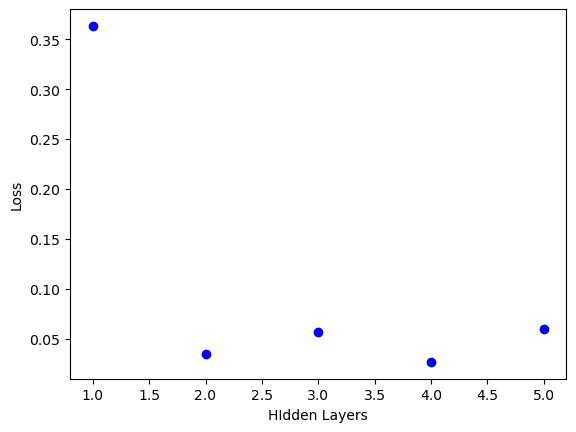

[0.3633359968662262, 0.03465220332145691, 0.0565946027636528, 0.02665257453918457, 0.059900492429733276]


In [7]:
# Plot the result
plt.scatter(num_layers, scores1_2, c='b')
plt.xlabel('HIdden Layers')
plt.ylabel('Loss')
plt.show()

print(scores1_2)

### Result of 1-B:
- 4 hidden layers are optimal for 2-neuron models

## 1-C. Train Neural Network with 3 neurons

In [8]:
# Repeat the same process as 2 neurons. Only change layer_size from 2 to 3

# define 'scores1_3' for scores of 3-neuron model in assignment 1
scores1_3 = []
layer_size = 3

for num_layer in num_layers:
    
    model = Sequential()
    model.add(Dense(layer_size, input_dim=2, activation='tanh'))
              
    for _ in range(num_layer):
        model.add(Dense(layer_size, activation='tanh'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    model.fit(X, y, batch_size=1, epochs=400)
    
    score = model.evaluate(X, y)
    scores1_3.append(score)
    print(len(model.layers), scores1_3)

Epoch 1/400
160/160 [==============================] - 1s 2ms/step - loss: 0.6968
Epoch 2/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6912
Epoch 3/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6850
Epoch 4/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6774
Epoch 5/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6679
Epoch 6/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6566
Epoch 7/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6447
Epoch 8/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6316
Epoch 9/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6182
Epoch 10/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6059
Epoch 11/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5926
Epoch 12/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5797
Epoch 13/400


160/160 [==============================] - 0s 2ms/step - loss: 0.1635
Epoch 100/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1626
Epoch 101/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1607
Epoch 102/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1561
Epoch 103/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1589
Epoch 104/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1593
Epoch 105/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1597
Epoch 106/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1596
Epoch 107/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1553
Epoch 108/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1478
Epoch 109/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1547
Epoch 110/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1563
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0720
Epoch 197/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0813
Epoch 198/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0755
Epoch 199/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 200/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0745
Epoch 201/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0763
Epoch 202/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 203/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0745
Epoch 204/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 205/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0748
Epoch 206/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0729
Epoch 207/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0751
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 294/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 295/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 296/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0469
Epoch 297/400
160/160 [==============================] - 1s 3ms/step - loss: 0.0540
Epoch 298/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 299/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 300/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0465
Epoch 301/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 302/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0504
Epoch 303/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0507
Epoch 304/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 391/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0453
Epoch 392/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0434
Epoch 393/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0411
Epoch 394/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0428
Epoch 395/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0444
Epoch 396/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0486
Epoch 397/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 398/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 399/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0453
Epoch 400/400
5/5 [==============================] - 0s 4ms/step - loss: 0.0395
3 [0.039479851722717285]
Epoch 1/400
160/160 [==============================] - 1s 2ms/step - 

160/160 [==============================] - 0s 2ms/step - loss: 0.0754
Epoch 88/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0722
Epoch 89/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 90/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 91/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0715
Epoch 92/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 93/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 94/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0765
Epoch 95/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 96/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 97/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0812
Epoch 98/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0780
Epoch 99/400
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 185/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 186/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0560
Epoch 187/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 188/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 189/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 190/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 191/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 192/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 193/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0619
Epoch 194/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0892
Epoch 195/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 282/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 283/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0366
Epoch 284/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 285/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0490
Epoch 286/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 287/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 288/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 289/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 290/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 291/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0434
Epoch 292/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0466
Epoch 379/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 380/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0421
Epoch 381/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 382/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 383/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0387
Epoch 384/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 385/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0384
Epoch 386/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0378
Epoch 387/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 388/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 389/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.4013
Epoch 76/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4004
Epoch 77/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4028
Epoch 78/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4171
Epoch 79/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4131
Epoch 80/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4037
Epoch 81/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3995
Epoch 82/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3925
Epoch 83/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4118
Epoch 84/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3982
Epoch 85/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4113
Epoch 86/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3987
Epoch 87/400
160/

Epoch 173/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3811
Epoch 174/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3742
Epoch 175/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3717
Epoch 176/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3736
Epoch 177/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3797
Epoch 178/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3736
Epoch 179/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4023
Epoch 180/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3712
Epoch 181/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3760
Epoch 182/400
160/160 [==============================] - 0s 2ms/step - loss: 0.4039
Epoch 183/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3752
Epoch 184/400
160/160 [==============================] - 0s 2ms/step - loss:

160/160 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 271/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0781
Epoch 272/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0834
Epoch 273/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0883
Epoch 274/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0931
Epoch 275/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1251
Epoch 276/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1023
Epoch 277/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0785
Epoch 278/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0948
Epoch 279/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0924
Epoch 280/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0484
Epoch 281/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0868
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0383
Epoch 368/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0378
Epoch 369/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0455
Epoch 370/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0382
Epoch 371/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0386
Epoch 372/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 373/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0428
Epoch 374/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 375/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0414
Epoch 376/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0410
Epoch 377/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0447
Epoch 378/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 

Epoch 64/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1123
Epoch 65/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1106
Epoch 66/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1157
Epoch 67/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1225
Epoch 68/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1251
Epoch 69/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0972
Epoch 70/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 71/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0889
Epoch 72/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0796
Epoch 73/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1072
Epoch 74/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0941
Epoch 75/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1264
Epoc

Epoch 162/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1227
Epoch 163/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0788
Epoch 164/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0797
Epoch 165/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 166/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0802
Epoch 167/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0739
Epoch 168/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 169/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 170/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0779
Epoch 171/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0642
Epoch 172/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0776
Epoch 173/400
160/160 [==============================] - 0s 2ms/step - loss:

160/160 [==============================] - 0s 2ms/step - loss: 0.0445
Epoch 260/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0526
Epoch 261/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0392
Epoch 262/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0463
Epoch 263/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0424
Epoch 264/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 265/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 266/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0371
Epoch 267/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0424
Epoch 268/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0377
Epoch 269/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0424
Epoch 270/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0413
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 357/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 358/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 359/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0301
Epoch 360/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 361/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 362/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 363/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 364/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 365/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 366/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 367/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.1126
Epoch 53/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1252
Epoch 54/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1534
Epoch 55/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1459
Epoch 56/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1602
Epoch 57/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1727
Epoch 58/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1488
Epoch 59/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1061
Epoch 60/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1372
Epoch 61/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1886
Epoch 62/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1155
Epoch 63/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1412
Epoch 64/400
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.0919
Epoch 151/400
160/160 [==============================] - 0s 3ms/step - loss: 0.1507
Epoch 152/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1843
Epoch 153/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1224
Epoch 154/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1198
Epoch 155/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1749
Epoch 156/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1134
Epoch 157/400
160/160 [==============================] - 0s 3ms/step - loss: 0.1126
Epoch 158/400
160/160 [==============================] - 1s 4ms/step - loss: 0.1276
Epoch 159/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0955
Epoch 160/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0623
Epoch 161/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 

160/160 [==============================] - 0s 3ms/step - loss: 0.0629
Epoch 248/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 249/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0662
Epoch 250/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0613
Epoch 251/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0448
Epoch 252/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0392
Epoch 253/400
160/160 [==============================] - 1s 3ms/step - loss: 0.0458
Epoch 254/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0400
Epoch 255/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0451
Epoch 256/400
160/160 [==============================] - 1s 3ms/step - loss: 0.0475
Epoch 257/400
160/160 [==============================] - 1s 4ms/step - loss: 0.0675
Epoch 258/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0656
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0567
Epoch 345/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0361
Epoch 346/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 347/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 348/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 349/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0414
Epoch 350/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0379
Epoch 351/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0414
Epoch 352/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 353/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 354/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0356
Epoch 355/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 

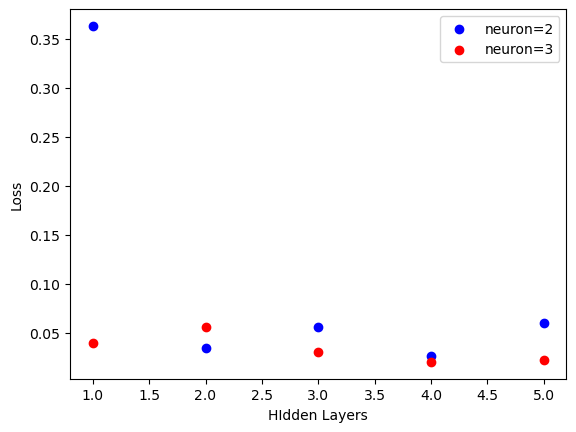

[0.3633359968662262, 0.03465220332145691, 0.0565946027636528, 0.02665257453918457, 0.059900492429733276]
[0.039479851722717285, 0.05617266148328781, 0.030184149742126465, 0.020512768998742104, 0.022529361769557]


In [9]:
# Plot the result
plt.scatter(num_layers, scores1_2, c='b')
plt.scatter(num_layers, scores1_3, c='r')
plt.legend(['neuron=2', 'neuron=3'])
plt.xlabel('HIdden Layers')
plt.ylabel('Loss')
plt.show()

print(scores1_2)
print(scores1_3)

### Result of 1-C:
- 4 hidden layers are optimal for 3-neuron models
- 3-neuron models outperform 2-neuron models in all hidden layers except 2 hiddel layers

## 1-D. Train Neural Network with 4 neurons

In [10]:
# Repeat the same process as 2 and 3 neurons. Only change layer_size into 4

# define 'scores1_4' for scores of 4-neuron model in assignment 1
scores1_4 = []
layer_size = 4

for num_layer in num_layers:
    
    model = Sequential()
    model.add(Dense(layer_size, input_dim=2, activation='tanh'))
              
    for _ in range(num_layer):
        model.add(Dense(layer_size, activation='tanh'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    model.fit(X, y, batch_size=1, epochs=400)
    
    score = model.evaluate(X, y)    
    scores1_4.append(score)
    print(len(model.layers), scores1_4)

Epoch 1/400
160/160 [==============================] - 1s 2ms/step - loss: 0.7201
Epoch 2/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7043
Epoch 3/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6977
Epoch 4/400
160/160 [==============================] - 0s 3ms/step - loss: 0.6950
Epoch 5/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6927
Epoch 6/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6905
Epoch 7/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6871
Epoch 8/400
160/160 [==============================] - 0s 3ms/step - loss: 0.6855
Epoch 9/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6810
Epoch 10/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6766
Epoch 11/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6705
Epoch 12/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6650
Epoch 13/400


160/160 [==============================] - 1s 4ms/step - loss: 0.1199
Epoch 100/400
160/160 [==============================] - 1s 4ms/step - loss: 0.1195
Epoch 101/400
160/160 [==============================] - 1s 5ms/step - loss: 0.1177
Epoch 102/400
160/160 [==============================] - 1s 3ms/step - loss: 0.1148
Epoch 103/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1166
Epoch 104/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1154
Epoch 105/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1092
Epoch 106/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1112
Epoch 107/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1079
Epoch 108/400
160/160 [==============================] - 0s 3ms/step - loss: 0.1047
Epoch 109/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1050
Epoch 110/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1033
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 197/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 198/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0482
Epoch 199/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 200/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0572
Epoch 201/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0528
Epoch 202/400
160/160 [==============================] - 1s 5ms/step - loss: 0.0500
Epoch 203/400
160/160 [==============================] - 1s 5ms/step - loss: 0.0511
Epoch 204/400
160/160 [==============================] - 1s 6ms/step - loss: 0.0479
Epoch 205/400
160/160 [==============================] - 1s 4ms/step - loss: 0.0520
Epoch 206/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0456
Epoch 207/400
160/160 [==============================] - 1s 3ms/step - loss: 0.0453
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 294/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0328
Epoch 295/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 296/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0362
Epoch 297/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 298/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 299/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 300/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0344
Epoch 301/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0327
Epoch 302/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0363
Epoch 303/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 304/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 391/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 392/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 393/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0267
Epoch 394/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 395/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 396/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 397/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 398/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 399/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 400/400
5/5 [==============================] - 1s 3ms/step - loss: 0.0263
3 [0.026274342089891434]
Epoch 1/400
160/160 [==============================] - 1s 2ms/step - 

160/160 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 88/400
160/160 [==============================] - 0s 3ms/step - loss: 0.1085
Epoch 89/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0849
Epoch 90/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0780
Epoch 91/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0731
Epoch 92/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0620
Epoch 93/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0866
Epoch 94/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0714
Epoch 95/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0825
Epoch 96/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0764
Epoch 97/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0812
Epoch 98/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0666
Epoch 99/400
160/

160/160 [==============================] - 0s 3ms/step - loss: 0.0630
Epoch 185/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0437
Epoch 186/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0377
Epoch 187/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 188/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0598
Epoch 189/400
160/160 [==============================] - 1s 3ms/step - loss: 0.0395
Epoch 190/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 191/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0380
Epoch 192/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 193/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 194/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0430
Epoch 195/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 282/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0320
Epoch 283/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0424
Epoch 284/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0390
Epoch 285/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0540
Epoch 286/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0397
Epoch 287/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 288/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0365
Epoch 289/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0432
Epoch 290/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 291/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 292/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 379/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 380/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 381/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 382/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 383/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 384/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 385/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 386/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0223
Epoch 387/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 388/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 389/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 

160/160 [==============================] - 0s 3ms/step - loss: 0.0679
Epoch 76/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0761
Epoch 77/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1036
Epoch 78/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0706
Epoch 79/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0953
Epoch 80/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 81/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0997
Epoch 82/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0878
Epoch 83/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 84/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0778
Epoch 85/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0972
Epoch 86/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0921
Epoch 87/400
160/

Epoch 173/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0429
Epoch 174/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 175/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 176/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0432
Epoch 177/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 178/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0340
Epoch 179/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 180/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 181/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0457
Epoch 182/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0319
Epoch 183/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0381
Epoch 184/400
160/160 [==============================] - 0s 2ms/step - loss:

160/160 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 271/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 272/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 273/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 274/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 275/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 276/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 277/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 278/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 279/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 280/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 281/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 368/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 369/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 370/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0233
Epoch 371/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 372/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 373/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 374/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 375/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 376/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 377/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 378/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 

Epoch 64/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0568
Epoch 65/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0792
Epoch 66/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1056
Epoch 67/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0898
Epoch 68/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 69/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1038
Epoch 70/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0900
Epoch 71/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1077
Epoch 72/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0962
Epoch 73/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0881
Epoch 74/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0748
Epoch 75/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0711
Epoc

Epoch 162/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 163/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0370
Epoch 164/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0420
Epoch 165/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 166/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 167/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0339
Epoch 168/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 169/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1494
Epoch 170/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 171/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0426
Epoch 172/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 173/400
160/160 [==============================] - 0s 2ms/step - loss:

160/160 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 260/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 261/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 262/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 263/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 264/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0215
Epoch 265/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 266/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 267/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 268/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0233
Epoch 269/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 270/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0384
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 357/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 358/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 359/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 360/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 361/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 362/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 363/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 364/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 365/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 366/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 367/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.2146
Epoch 53/400
160/160 [==============================] - 0s 2ms/step - loss: 0.2693
Epoch 54/400
160/160 [==============================] - 0s 2ms/step - loss: 0.2034
Epoch 55/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1781
Epoch 56/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1822
Epoch 57/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1829
Epoch 58/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1466
Epoch 59/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1077
Epoch 60/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1546
Epoch 61/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1371
Epoch 62/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1385
Epoch 63/400
160/160 [==============================] - 0s 2ms/step - loss: 0.2068
Epoch 64/400
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 151/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0555
Epoch 152/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 153/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0775
Epoch 154/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0758
Epoch 155/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 156/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0735
Epoch 157/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 158/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0617
Epoch 159/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 160/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 161/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0588
Epoch 

160/160 [==============================] - 0s 3ms/step - loss: 0.0646
Epoch 248/400
160/160 [==============================] - 1s 3ms/step - loss: 0.0374
Epoch 249/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0357
Epoch 250/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0322
Epoch 251/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0456
Epoch 252/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0430
Epoch 253/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0289
Epoch 254/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0382
Epoch 255/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0330
Epoch 256/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0454
Epoch 257/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0402
Epoch 258/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0444
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 345/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 346/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 347/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 348/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 349/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0233
Epoch 350/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 351/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 352/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 353/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 354/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 355/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 

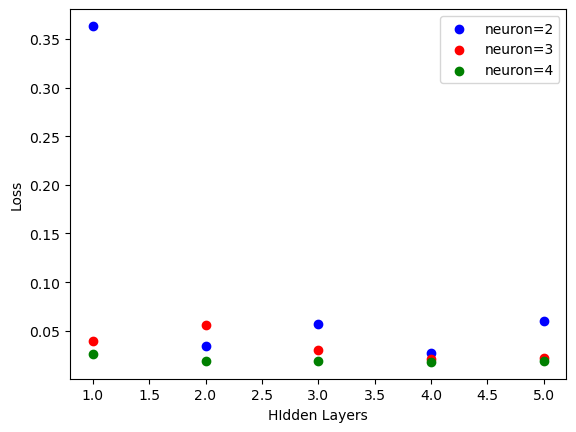

[0.3633359968662262, 0.03465220332145691, 0.0565946027636528, 0.02665257453918457, 0.059900492429733276]
[0.039479851722717285, 0.05617266148328781, 0.030184149742126465, 0.020512768998742104, 0.022529361769557]
[0.026274342089891434, 0.01889568567276001, 0.01870402693748474, 0.01799273118376732, 0.018439937382936478]


In [11]:
# Plot the result
plt.scatter(num_layers, scores1_2, c='b')
plt.scatter(num_layers, scores1_3, c='r')
plt.scatter(num_layers, scores1_4, c='g')
plt.legend(['neuron=2', 'neuron=3', 'neuron=4'])
plt.xlabel('HIdden Layers')
plt.ylabel('Loss')
plt.show()

print(scores1_2)
print(scores1_3)
print(scores1_4)

### Result of 1-D
- 4 hidden layers are optimal for 4-neuron models (Loss = 0.01799..)
- 4-neuron models outperform 2-neuron and 3-neuron models in all hidden layers

### Overall Result of 1-B to 1-D : 4 neuron-model with 4 hidden layers is the optimal configuration
* 1 batch size, 400 epoch
* tanh function for input and hidden layers
* sigmoid function for output layer

## 1-E. Compare activate functions

In [12]:
# define four activate functions as 'activate_functions'
activate_functions = ['tanh', 'relu', 'sigmoid', 'softplus']

# define 'scores1_af' for scores of activate functions in assignment 1
scores1_af = []

# use 'for' loop to acquire score for each function
for af in activate_functions:

    # generate the optimal sequential model(4-neuron, 4 hidden layers) for each activate function.
    model = Sequential()
    model.add(Dense(4, input_dim=2, activation=af))
    model.add(Dense(4, activation=af))
    model.add(Dense(4, activation=af))
    model.add(Dense(4, activation=af))
    model.add(Dense(4, activation=af))
    # keep activation function of the output layer as 'sigmoid'
    # because the model did not fit well when using other activation functions (loss soars above 7.0)
    model.add(Dense(1, activation='sigmoid'))
    
    # compile and fit
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    model.fit(X, y, batch_size=1, epochs=400)

    score = model.evaluate(X, y)    
    scores1_af.append(score)
    print(len(model.layers), scores1_af)

Epoch 1/400
160/160 [==============================] - 2s 3ms/step - loss: 0.7020
Epoch 2/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6822
Epoch 3/400
160/160 [==============================] - 0s 3ms/step - loss: 0.6657
Epoch 4/400
160/160 [==============================] - 0s 3ms/step - loss: 0.6457
Epoch 5/400
160/160 [==============================] - 0s 3ms/step - loss: 0.6358
Epoch 6/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6209
Epoch 7/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6135
Epoch 8/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6059
Epoch 9/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6038
Epoch 10/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6010
Epoch 11/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5944
Epoch 12/400
160/160 [==============================] - 0s 3ms/step - loss: 0.5927
Epoch 13/400


160/160 [==============================] - 0s 2ms/step - loss: 0.0911
Epoch 100/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1003
Epoch 101/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 102/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0941
Epoch 103/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0820
Epoch 104/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0775
Epoch 105/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 106/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 107/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0635
Epoch 108/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 109/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0714
Epoch 110/400
160/160 [==============================] - 0s 2ms/step - loss: 0.1165
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0651
Epoch 197/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0419
Epoch 198/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0526
Epoch 199/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 200/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 201/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 202/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 203/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 204/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0465
Epoch 205/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 206/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0371
Epoch 207/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 294/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 295/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 296/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 297/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0295
Epoch 298/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 299/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0249
Epoch 300/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0288
Epoch 301/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 302/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0286
Epoch 303/400
160/160 [==============================] - 0s 3ms/step - loss: 0.0420
Epoch 304/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 391/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 392/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0223
Epoch 393/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 394/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 395/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 396/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0215
Epoch 397/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 398/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 399/400
160/160 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 400/400
5/5 [==============================] - 0s 3ms/step - loss: 0.0186
6 [0.018594099208712578]
Epoch 1/400
160/160 [==============================] - 1s 2ms/step - 

160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 88/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 89/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 90/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 91/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 92/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 93/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 94/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 95/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 96/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 97/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 98/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 99/400
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 185/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 186/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 187/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6942
Epoch 188/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 189/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 190/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 191/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 192/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6942
Epoch 193/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 194/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 195/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 282/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 283/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 284/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 285/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 286/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 287/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 288/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 289/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 290/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 291/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 292/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 379/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 380/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 381/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 382/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 383/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 384/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6941
Epoch 385/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 386/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 387/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 388/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 389/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 76/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6956
Epoch 77/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 78/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6956
Epoch 79/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 80/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 81/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6954
Epoch 82/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 83/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 84/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 85/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 86/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 87/400
160/

Epoch 173/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 174/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6953
Epoch 175/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 176/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 177/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6954
Epoch 178/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 179/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 180/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6949
Epoch 181/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6953
Epoch 182/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 183/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6955
Epoch 184/400
160/160 [==============================] - 0s 2ms/step - loss:

160/160 [==============================] - 0s 2ms/step - loss: 0.6950
Epoch 271/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6956
Epoch 272/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6955
Epoch 273/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 274/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 275/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6952
Epoch 276/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 277/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 278/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6952
Epoch 279/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6952
Epoch 280/400
160/160 [==============================] - 0s 3ms/step - loss: 0.6958
Epoch 281/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6953
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.6956
Epoch 368/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6945
Epoch 369/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 370/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 371/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6954
Epoch 372/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6949
Epoch 373/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6955
Epoch 374/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6953
Epoch 375/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6956
Epoch 376/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 377/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 378/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6956
Epoch 

Epoch 64/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6955
Epoch 65/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6954
Epoch 66/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 67/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6955
Epoch 68/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 69/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6956
Epoch 70/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 71/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6951
Epoch 72/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 73/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6953
Epoch 74/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6955
Epoch 75/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6956
Epoc

Epoch 162/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6947
Epoch 163/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6950
Epoch 164/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6948
Epoch 165/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6948
Epoch 166/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6947
Epoch 167/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6946
Epoch 168/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6949
Epoch 169/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6948
Epoch 170/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6944
Epoch 171/400
160/160 [==============================] - 0s 3ms/step - loss: 0.6949
Epoch 172/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6947
Epoch 173/400
160/160 [==============================] - 0s 3ms/step - loss:

160/160 [==============================] - 0s 2ms/step - loss: 0.6939
Epoch 260/400
160/160 [==============================] - 0s 3ms/step - loss: 0.6940
Epoch 261/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6933
Epoch 262/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6939
Epoch 263/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6935
Epoch 264/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6935
Epoch 265/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6938
Epoch 266/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6933
Epoch 267/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6936
Epoch 268/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6938
Epoch 269/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6937
Epoch 270/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6933
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.3363
Epoch 357/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3580
Epoch 358/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3605
Epoch 359/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3584
Epoch 360/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3408
Epoch 361/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3370
Epoch 362/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3476
Epoch 363/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3336
Epoch 364/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3295
Epoch 365/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3362
Epoch 366/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3415
Epoch 367/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3272
Epoch 

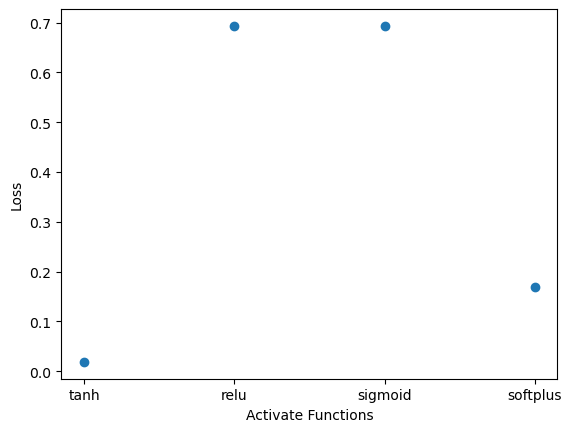

[0.018594099208712578, 0.6931766271591187, 0.6931482553482056, 0.1683395802974701]


In [13]:
#Plot the result
plt.scatter(activate_functions, scores1_af)
plt.xlabel('Activate Functions')
plt.ylabel('Loss')
plt.show()

print(scores1_af)

### Result of 1-E:
- 'tanh' function had the best performance of the four activation functions (Loss = 0.01859..)

## 1-F. Compare optimizers

In [14]:
# import three new optimizers
from keras.optimizers import Adam, RMSprop, Lion

# define three new optimizers
Adam = Adam(learning_rate=0.1)
RMSprop = RMSprop(learning_rate=0.1)
Lion = Lion(learning_rate=0.1)

In [15]:
# define four optimizers as 'activate_functions'

optimizers = [sgd, Adam, RMSprop, Lion]

# define 'scores1_op' for scores of optimizers in assignment 1
scores1_op = []

for op in optimizers:

   # generate the optimal sequential model (4-neuron, 4 hidden layers, activation = 'tanh')
    model = Sequential()
    model.add(Dense(4, input_dim=2, activation='tanh'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(1, activation= 'sigmoid'))

    # compile and fit for each optimizer
    model.compile(loss='binary_crossentropy', optimizer=op)
    model.fit(X, y, batch_size=1, epochs=400)

    # generate scores
    score = model.evaluate(X, y)    
    scores1_op.append(score)
    print(len(model.layers), scores1_op)

Epoch 1/400
160/160 [==============================] - 1s 2ms/step - loss: 0.6860
Epoch 2/400
160/160 [==============================] - 0s 3ms/step - loss: 0.6439
Epoch 3/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6375
Epoch 4/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6286
Epoch 5/400
160/160 [==============================] - 1s 3ms/step - loss: 0.6209
Epoch 6/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6152
Epoch 7/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6424
Epoch 8/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6246
Epoch 9/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6016
Epoch 10/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6150
Epoch 11/400
160/160 [==============================] - 0s 3ms/step - loss: 0.6350
Epoch 12/400
160/160 [==============================] - 0s 2ms/step - loss: 0.6250
Epoch 13/400


160/160 [==============================] - 0s 2ms/step - loss: 0.5375
Epoch 100/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5344
Epoch 101/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5365
Epoch 102/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5358
Epoch 103/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5458
Epoch 104/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5395
Epoch 105/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5361
Epoch 106/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5235
Epoch 107/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5412
Epoch 108/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5620
Epoch 109/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5583
Epoch 110/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5589
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.5183
Epoch 197/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5209
Epoch 198/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5094
Epoch 199/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5169
Epoch 200/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5145
Epoch 201/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5156
Epoch 202/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5133
Epoch 203/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5203
Epoch 204/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5119
Epoch 205/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5112
Epoch 206/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5187
Epoch 207/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5173
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.5189
Epoch 294/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5148
Epoch 295/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5157
Epoch 296/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5191
Epoch 297/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5186
Epoch 298/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5169
Epoch 299/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5146
Epoch 300/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5187
Epoch 301/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5146
Epoch 302/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5142
Epoch 303/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5200
Epoch 304/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5137
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.5202
Epoch 391/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5166
Epoch 392/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5097
Epoch 393/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5204
Epoch 394/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5136
Epoch 395/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5171
Epoch 396/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5149
Epoch 397/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5190
Epoch 398/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5140
Epoch 399/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5163
Epoch 400/400
5/5 [==============================] - 0s 3ms/step - loss: 0.5102
6 [0.5101855397224426]
Epoch 1/400
160/160 [==============================] - 2s 2ms/step - lo

160/160 [==============================] - 0s 3ms/step - loss: 0.7648
Epoch 88/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7422
Epoch 89/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7826
Epoch 90/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7489
Epoch 91/400
160/160 [==============================] - 0s 3ms/step - loss: 0.7665
Epoch 92/400
160/160 [==============================] - 0s 3ms/step - loss: 0.7392
Epoch 93/400
160/160 [==============================] - 1s 3ms/step - loss: 0.7602
Epoch 94/400
160/160 [==============================] - 0s 3ms/step - loss: 0.7529
Epoch 95/400
160/160 [==============================] - 0s 3ms/step - loss: 0.7724
Epoch 96/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7657
Epoch 97/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7686
Epoch 98/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7432
Epoch 99/400
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.7529
Epoch 185/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7537
Epoch 186/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7430
Epoch 187/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7720
Epoch 188/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7428
Epoch 189/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7454
Epoch 190/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7430
Epoch 191/400
160/160 [==============================] - 0s 3ms/step - loss: 0.7760
Epoch 192/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7296
Epoch 193/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7827
Epoch 194/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7389
Epoch 195/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7372
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.7479
Epoch 282/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7401
Epoch 283/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7769
Epoch 284/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8386
Epoch 285/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7461
Epoch 286/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7394
Epoch 287/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7691
Epoch 288/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8206
Epoch 289/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7215
Epoch 290/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7727
Epoch 291/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7583
Epoch 292/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7368
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.7807
Epoch 379/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8043
Epoch 380/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7883
Epoch 381/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7274
Epoch 382/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7721
Epoch 383/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7427
Epoch 384/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7621
Epoch 385/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7768
Epoch 386/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7897
Epoch 387/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7495
Epoch 388/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7897
Epoch 389/400
160/160 [==============================] - 0s 3ms/step - loss: 0.7644
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.5451
Epoch 76/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5703
Epoch 77/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5428
Epoch 78/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5345
Epoch 79/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5318
Epoch 80/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5355
Epoch 81/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5342
Epoch 82/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5441
Epoch 83/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5456
Epoch 84/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5335
Epoch 85/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5418
Epoch 86/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5338
Epoch 87/400
160/

Epoch 173/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5473
Epoch 174/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5215
Epoch 175/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 176/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5209
Epoch 177/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5330
Epoch 178/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5308
Epoch 179/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5171
Epoch 180/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5399
Epoch 181/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5430
Epoch 182/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5350
Epoch 183/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5427
Epoch 184/400
160/160 [==============================] - 0s 2ms/step - loss:

160/160 [==============================] - 0s 2ms/step - loss: 0.5573
Epoch 271/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5577
Epoch 272/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5466
Epoch 273/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5333
Epoch 274/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5168
Epoch 275/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5254
Epoch 276/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5447
Epoch 277/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5338
Epoch 278/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5404
Epoch 279/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5287
Epoch 280/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5440
Epoch 281/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5614
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.5260
Epoch 368/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5290
Epoch 369/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 370/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5354
Epoch 371/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5545
Epoch 372/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5408
Epoch 373/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5417
Epoch 374/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 375/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5417
Epoch 376/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5333
Epoch 377/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 378/400
160/160 [==============================] - 0s 2ms/step - loss: 0.5387
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.8032
Epoch 65/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8385
Epoch 66/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7968
Epoch 67/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8355
Epoch 68/400
160/160 [==============================] - 0s 2ms/step - loss: 0.9823
Epoch 69/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8272
Epoch 70/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8444
Epoch 71/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8209
Epoch 72/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8150
Epoch 73/400
160/160 [==============================] - 0s 2ms/step - loss: 0.9100
Epoch 74/400
160/160 [==============================] - 0s 2ms/step - loss: 1.0815
Epoch 75/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8080
Epoch 76/400
160/

160/160 [==============================] - 0s 2ms/step - loss: 1.0648
Epoch 163/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8801
Epoch 164/400
160/160 [==============================] - 0s 2ms/step - loss: 1.0626
Epoch 165/400
160/160 [==============================] - 0s 2ms/step - loss: 1.0003
Epoch 166/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7745
Epoch 167/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8966
Epoch 168/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8499
Epoch 169/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8363
Epoch 170/400
160/160 [==============================] - 0s 2ms/step - loss: 0.7995
Epoch 171/400
160/160 [==============================] - 0s 2ms/step - loss: 0.9573
Epoch 172/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8900
Epoch 173/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8644
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.9109
Epoch 260/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8276
Epoch 261/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8325
Epoch 262/400
160/160 [==============================] - 0s 2ms/step - loss: 0.9865
Epoch 263/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8949
Epoch 264/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8878
Epoch 265/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8712
Epoch 266/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8461
Epoch 267/400
160/160 [==============================] - 0s 2ms/step - loss: 0.9002
Epoch 268/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8936
Epoch 269/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8672
Epoch 270/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8653
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.7930
Epoch 357/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8267
Epoch 358/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8770
Epoch 359/400
160/160 [==============================] - 0s 2ms/step - loss: 0.9810
Epoch 360/400
160/160 [==============================] - 0s 2ms/step - loss: 0.9860
Epoch 361/400
160/160 [==============================] - 0s 2ms/step - loss: 1.0002
Epoch 362/400
160/160 [==============================] - 0s 2ms/step - loss: 1.0400
Epoch 363/400
160/160 [==============================] - 0s 2ms/step - loss: 0.9021
Epoch 364/400
160/160 [==============================] - 0s 2ms/step - loss: 0.9406
Epoch 365/400
160/160 [==============================] - 0s 2ms/step - loss: 0.9246
Epoch 366/400
160/160 [==============================] - 0s 2ms/step - loss: 1.2212
Epoch 367/400
160/160 [==============================] - 0s 2ms/step - loss: 0.8585
Epoch 

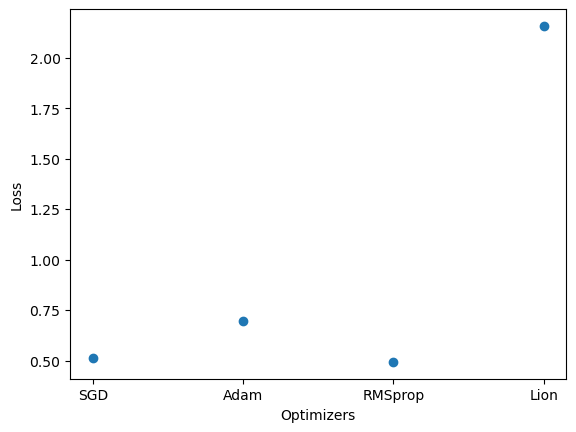

[0.5101855397224426, 0.6957978010177612, 0.49299997091293335, 2.1574771404266357]


In [16]:
#Plot the result
plt.scatter(['SGD', 'Adam', 'RMSprop', 'Lion'], scores1_op)
plt.xlabel('Optimizers')
plt.ylabel('Loss')
plt.show()

print(scores1_op)

### Result of 1-F:
 - The optimizer 'RMSProp' outperforms other optimizers (Loss = 0.4929...)

## Overall Result : Optimal Configuration of Assignment 1 (XOR Dataset)
- 4-neuron and 4 hidden layers
- 'tanh' activation function
- 'RMSProp' optimizer

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

## 2-A. generating dataset

- Dataset from UCI: Wine Quality (https://archive.ics.uci.edu/dataset/186/wine+quality)
- Classifying good wine (score >= 6) and normal wine (score <6)

In [17]:
import pandas as pd

# load dataset
df = pd.read_csv("winequality-red.csv")

# convert quality value into binary value to make classification model 
# values from 6 to 10 are transformed into value 1(good wine), and values from 1 to 5 are transformed into value 0(normal wine)
df['quality'] = df.quality.between(6,10).astype(int)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [18]:
# define X, Y, and transfrom dataframe into numpy array

X = df.drop(['quality'], axis=1).to_numpy()
Y = df['quality'].to_numpy()
X.shape, Y.shape

((1599, 11), (1599,))

## 2-B. Find optimal number of neurons and layers

- repeat the same process as assignment 1 (1-B to 1-D)
- because there are 11 input variables, extend number of neurons and layers
- number of layers : 1 to 10
- number of neurons : 5, 10, 15

In [19]:
num_layers = [1,2,3,4,5,6,7,8,9,10]

# set SGD for optimizer
sgd = SGD(learning_rate=0.1)

In [20]:
# define 'scores2_5' for scores 5-neuron model in assignment 2
scores2_5 = []
layer_size = 5

for num_layer in num_layers:
    
    # generate sequential model and add input layer
    model = Sequential()
    model.add(Dense(layer_size, input_dim=11, activation='tanh'))

    # add hidden layers
    for _ in range(num_layer):
        model.add(Dense(layer_size, activation='tanh'))
    
    # add output layers
    model.add(Dense(1, activation='sigmoid'))

    # compile and print
    # set batch_size=10 to use 10% of datset as samples
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    model.fit(X, Y, batch_size=10, epochs=200)
    
    # calculate scores
    score = model.evaluate(X, Y)    
    scores2_5.append(score)
    print(len(model.layers), scores2_5)

Epoch 1/200
160/160 [==============================] - 1s 2ms/step - loss: 0.7069
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6917
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6907
Epoch 4/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6904
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6907
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6892
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6899
Epoch 8/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6877
Epoch 9/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6892
Epoch 10/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6885
Epoch 11/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6877
Epoch 12/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6873
Epoch 13/200


160/160 [==============================] - 0s 2ms/step - loss: 0.6563
Epoch 100/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6546
Epoch 101/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6547
Epoch 102/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6625
Epoch 103/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6537
Epoch 104/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6560
Epoch 105/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6548
Epoch 106/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6549
Epoch 107/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6479
Epoch 108/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6545
Epoch 109/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6577
Epoch 110/200
160/160 [==============================] - 0s 1ms/step - loss: 0.6606
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.6559
Epoch 197/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6534
Epoch 198/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6537
Epoch 199/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6547
Epoch 200/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6516
3 [0.6515727639198303]
Epoch 1/200
160/160 [==============================] - 1s 2ms/step - loss: 0.6967
Epoch 2/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6943
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6926
Epoch 4/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6915
Epoch 5/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6907
Epoch 6/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6907
Epoch 7/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6900

160/160 [==============================] - 0s 2ms/step - loss: 0.6550
Epoch 94/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6580
Epoch 95/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6571
Epoch 96/200
160/160 [==============================] - 0s 1ms/step - loss: 0.6581
Epoch 97/200
160/160 [==============================] - 0s 1ms/step - loss: 0.6528
Epoch 98/200
160/160 [==============================] - 0s 1ms/step - loss: 0.6529
Epoch 99/200
160/160 [==============================] - 0s 1ms/step - loss: 0.6557
Epoch 100/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6528
Epoch 101/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6567
Epoch 102/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6546
Epoch 103/200
160/160 [==============================] - 0s 1ms/step - loss: 0.6529
Epoch 104/200
160/160 [==============================] - 0s 1ms/step - loss: 0.6579
Epoch 105/20

160/160 [==============================] - 0s 2ms/step - loss: 0.6562
Epoch 191/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6303
Epoch 192/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6206
Epoch 193/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6062
Epoch 194/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6022
Epoch 195/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6118
Epoch 196/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6091
Epoch 197/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6048
Epoch 198/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6101
Epoch 199/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6265
Epoch 200/200
50/50 [==============================] - 0s 2ms/step - loss: 0.5867
4 [0.6515727639198303, 0.5866639018058777]
Epoch 1/200
160/160 [============================

160/160 [==============================] - 0s 2ms/step - loss: 0.6601
Epoch 88/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6555
Epoch 89/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6626
Epoch 90/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6562
Epoch 91/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6592
Epoch 92/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6590
Epoch 93/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6593
Epoch 94/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6585
Epoch 95/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6633
Epoch 96/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6585
Epoch 97/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6580
Epoch 98/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6581
Epoch 99/200
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.6544
Epoch 185/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6607
Epoch 186/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6580
Epoch 187/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6579
Epoch 188/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6545
Epoch 189/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6599
Epoch 190/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6545
Epoch 191/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6533
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6579
Epoch 193/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6529
Epoch 194/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6555
Epoch 195/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6512
Epoch 

160/160 [==============================] - 0s 3ms/step - loss: 0.6576
Epoch 82/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6575
Epoch 83/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6578
Epoch 84/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6536
Epoch 85/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6543
Epoch 86/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6545
Epoch 87/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6556
Epoch 88/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6518
Epoch 89/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6570
Epoch 90/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6557
Epoch 91/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6549
Epoch 92/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6555
Epoch 93/200
160/

160/160 [==============================] - 1s 3ms/step - loss: 0.6592
Epoch 179/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6532
Epoch 180/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6522
Epoch 181/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6576
Epoch 182/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6574
Epoch 183/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6543
Epoch 184/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6531
Epoch 185/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6554
Epoch 186/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6544
Epoch 187/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6520
Epoch 188/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6552
Epoch 189/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6571
Epoch 

160/160 [==============================] - 1s 4ms/step - loss: 0.6553
Epoch 75/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6546
Epoch 76/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6555
Epoch 77/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6550
Epoch 78/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6529
Epoch 79/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6541
Epoch 80/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6557
Epoch 81/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6554
Epoch 82/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6582
Epoch 83/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6565
Epoch 84/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6544
Epoch 85/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6592
Epoch 86/200
160/

Epoch 172/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6535
Epoch 173/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6548
Epoch 174/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6551
Epoch 175/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6512
Epoch 176/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6566
Epoch 177/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6513
Epoch 178/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6605
Epoch 179/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6597
Epoch 180/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6551
Epoch 181/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6567
Epoch 182/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6542
Epoch 183/200
160/160 [==============================] - 1s 3ms/step - loss:

160/160 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 69/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 70/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 71/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6909
Epoch 72/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6909
Epoch 73/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 74/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6910
Epoch 75/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 76/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 77/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6908
Epoch 78/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6905
Epoch 79/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6909
Epoch 80/200
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.6907
Epoch 167/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6908
Epoch 168/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6908
Epoch 169/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6907
Epoch 170/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6908
Epoch 171/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6908
Epoch 172/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6908
Epoch 173/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6908
Epoch 174/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6907
Epoch 175/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6906
Epoch 176/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6908
Epoch 177/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6907
Epoch 

160/160 [==============================] - 0s 3ms/step - loss: 0.6865
Epoch 63/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6869
Epoch 64/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6868
Epoch 65/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6864
Epoch 66/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6860
Epoch 67/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6869
Epoch 68/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6857
Epoch 69/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6861
Epoch 70/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6864
Epoch 71/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6858
Epoch 72/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6867
Epoch 73/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6863
Epoch 74/200
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.6364
Epoch 161/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6275
Epoch 162/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6414
Epoch 163/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6349
Epoch 164/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6324
Epoch 165/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6392
Epoch 166/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6338
Epoch 167/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6446
Epoch 168/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6411
Epoch 169/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6414
Epoch 170/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6265
Epoch 171/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6300
Epoch 

Epoch 56/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6590
Epoch 57/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6556
Epoch 58/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6580
Epoch 59/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6576
Epoch 60/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6575
Epoch 61/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6568
Epoch 62/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6599
Epoch 63/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6570
Epoch 64/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6615
Epoch 65/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6588
Epoch 66/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6581
Epoch 67/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6558
Epoc

160/160 [==============================] - 1s 3ms/step - loss: 0.6512
Epoch 155/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6526
Epoch 156/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6509
Epoch 157/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6514
Epoch 158/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6508
Epoch 159/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6498
Epoch 160/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6497
Epoch 161/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6526
Epoch 162/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6503
Epoch 163/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6517
Epoch 164/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6502
Epoch 165/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6531
Epoch 

160/160 [==============================] - 0s 3ms/step - loss: 0.6914
Epoch 50/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6911
Epoch 51/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6913
Epoch 52/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6908
Epoch 53/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6915
Epoch 54/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6914
Epoch 55/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6913
Epoch 56/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6911
Epoch 57/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6914
Epoch 58/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6911
Epoch 59/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6912
Epoch 60/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6913
Epoch 61/200
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.6909
Epoch 148/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6911
Epoch 149/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6911
Epoch 150/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 151/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6911
Epoch 152/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6909
Epoch 153/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 154/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6911
Epoch 155/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6911
Epoch 156/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6909
Epoch 157/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 158/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6911
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.6915
Epoch 43/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6916
Epoch 44/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6915
Epoch 45/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6914
Epoch 46/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6916
Epoch 47/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6918
Epoch 48/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6916
Epoch 49/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6913
Epoch 50/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6911
Epoch 51/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6912
Epoch 52/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6914
Epoch 53/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6912
Epoch 54/200
160/

160/160 [==============================] - 0s 3ms/step - loss: 0.6912
Epoch 141/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6914
Epoch 142/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6913
Epoch 143/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6911
Epoch 144/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6914
Epoch 145/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6913
Epoch 146/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6912
Epoch 147/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6913
Epoch 148/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6910
Epoch 149/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6914
Epoch 150/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6913
Epoch 151/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6913
Epoch 

In [21]:
# Same process with the previous cell
# define 'scores2_10' for scores 10-neuron model in assignment 2
scores2_10 = []
layer_size = 10

for num_layer in num_layers:
    
    model = Sequential()
    model.add(Dense(layer_size, input_dim=11, activation='tanh'))
              
    for _ in range(num_layer):
        model.add(Dense(layer_size, activation='tanh'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    model.fit(X, Y, batch_size=10, epochs=200)
    
    score = model.evaluate(X, Y)    
    scores2_10.append(score)
    print(len(model.layers), scores2_10)

Epoch 1/200
160/160 [==============================] - 1s 2ms/step - loss: 0.6743
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6569
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6573
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6571
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6532
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6570
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6544
Epoch 8/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6522
Epoch 9/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6600
Epoch 10/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6562
Epoch 11/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6559
Epoch 12/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6509
Epoch 13/200


160/160 [==============================] - 0s 2ms/step - loss: 0.6412
Epoch 100/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6411
Epoch 101/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6433
Epoch 102/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6400
Epoch 103/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6389
Epoch 104/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6428
Epoch 105/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6387
Epoch 106/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6406
Epoch 107/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6414
Epoch 108/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6457
Epoch 109/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6429
Epoch 110/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6392
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.5980
Epoch 197/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6018
Epoch 198/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6029
Epoch 199/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6054
Epoch 200/200
50/50 [==============================] - 0s 2ms/step - loss: 0.5797
3 [0.5796726942062378]
Epoch 1/200
160/160 [==============================] - 1s 2ms/step - loss: 0.6884
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6713
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6628
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6620
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6660
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6615
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6602

160/160 [==============================] - 0s 2ms/step - loss: 0.6408
Epoch 94/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6458
Epoch 95/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6461
Epoch 96/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6456
Epoch 97/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6428
Epoch 98/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6444
Epoch 99/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6419
Epoch 100/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6418
Epoch 101/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6387
Epoch 102/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6411
Epoch 103/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6402
Epoch 104/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6399
Epoch 105/20

160/160 [==============================] - 0s 2ms/step - loss: 0.5949
Epoch 191/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5979
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5962
Epoch 193/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6016
Epoch 194/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5966
Epoch 195/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6006
Epoch 196/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5886
Epoch 197/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5964
Epoch 198/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6048
Epoch 199/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6045
Epoch 200/200
50/50 [==============================] - 0s 2ms/step - loss: 0.5824
4 [0.5796726942062378, 0.5824112296104431]
Epoch 1/200
160/160 [============================

160/160 [==============================] - 0s 2ms/step - loss: 0.6369
Epoch 88/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6376
Epoch 89/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6330
Epoch 90/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6336
Epoch 91/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6389
Epoch 92/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6291
Epoch 93/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6390
Epoch 94/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6321
Epoch 95/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6258
Epoch 96/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6305
Epoch 97/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6243
Epoch 98/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6279
Epoch 99/200
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.5984
Epoch 185/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5891
Epoch 186/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5955
Epoch 187/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5941
Epoch 188/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5918
Epoch 189/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5951
Epoch 190/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5940
Epoch 191/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5956
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6056
Epoch 193/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5952
Epoch 194/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5968
Epoch 195/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5945
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.6409
Epoch 82/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6246
Epoch 83/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6462
Epoch 84/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6369
Epoch 85/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6335
Epoch 86/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6325
Epoch 87/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6366
Epoch 88/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6333
Epoch 89/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6353
Epoch 90/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6345
Epoch 91/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6269
Epoch 92/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6203
Epoch 93/200
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.6049
Epoch 179/200
160/160 [==============================] - 1s 4ms/step - loss: 0.5973
Epoch 180/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5983
Epoch 181/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5925
Epoch 182/200
160/160 [==============================] - 1s 3ms/step - loss: 0.5993
Epoch 183/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6064
Epoch 184/200
160/160 [==============================] - 1s 4ms/step - loss: 0.5984
Epoch 185/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6033
Epoch 186/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5965
Epoch 187/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6029
Epoch 188/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5984
Epoch 189/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5897
Epoch 

160/160 [==============================] - 0s 3ms/step - loss: 0.6887
Epoch 75/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6889
Epoch 76/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6885
Epoch 77/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6891
Epoch 78/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6886
Epoch 79/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6888
Epoch 80/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6883
Epoch 81/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6884
Epoch 82/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6887
Epoch 83/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6884
Epoch 84/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6882
Epoch 85/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6885
Epoch 86/200
160/

Epoch 172/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6861
Epoch 173/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6862
Epoch 174/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6867
Epoch 175/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6862
Epoch 176/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6861
Epoch 177/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6861
Epoch 178/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6862
Epoch 179/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6863
Epoch 180/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6861
Epoch 181/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6859
Epoch 182/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6864
Epoch 183/200
160/160 [==============================] - 0s 3ms/step - loss:

160/160 [==============================] - 0s 2ms/step - loss: 0.6588
Epoch 69/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6589
Epoch 70/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6554
Epoch 71/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6611
Epoch 72/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6629
Epoch 73/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6567
Epoch 74/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6564
Epoch 75/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6556
Epoch 76/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6577
Epoch 77/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6579
Epoch 78/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6580
Epoch 79/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6596
Epoch 80/200
160/

160/160 [==============================] - 1s 3ms/step - loss: 0.6530
Epoch 167/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6547
Epoch 168/200
160/160 [==============================] - 1s 5ms/step - loss: 0.6608
Epoch 169/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6542
Epoch 170/200
160/160 [==============================] - 1s 5ms/step - loss: 0.6525
Epoch 171/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6523
Epoch 172/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6629
Epoch 173/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6562
Epoch 174/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6538
Epoch 175/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6559
Epoch 176/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6514
Epoch 177/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6580
Epoch 

160/160 [==============================] - 1s 3ms/step - loss: 0.6609
Epoch 63/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6561
Epoch 64/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6598
Epoch 65/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6605
Epoch 66/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6576
Epoch 67/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6586
Epoch 68/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6572
Epoch 69/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6629
Epoch 70/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6610
Epoch 71/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6600
Epoch 72/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6615
Epoch 73/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6632
Epoch 74/200
160/

160/160 [==============================] - 0s 3ms/step - loss: 0.6546
Epoch 161/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6563
Epoch 162/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6555
Epoch 163/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6511
Epoch 164/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6490
Epoch 165/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6588
Epoch 166/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6600
Epoch 167/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6531
Epoch 168/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6522
Epoch 169/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6544
Epoch 170/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6578
Epoch 171/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6535
Epoch 

Epoch 56/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6475
Epoch 57/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6507
Epoch 58/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6468
Epoch 59/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6435
Epoch 60/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6529
Epoch 61/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6487
Epoch 62/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6442
Epoch 63/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6486
Epoch 64/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6468
Epoch 65/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6492
Epoch 66/200
160/160 [==============================] - 1s 5ms/step - loss: 0.6504
Epoch 67/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6490
Epoc

160/160 [==============================] - 1s 5ms/step - loss: 0.6251
Epoch 155/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6178
Epoch 156/200
160/160 [==============================] - 1s 9ms/step - loss: 0.6180
Epoch 157/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6170
Epoch 158/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6197
Epoch 159/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6308
Epoch 160/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6309
Epoch 161/200
160/160 [==============================] - 1s 5ms/step - loss: 0.6286
Epoch 162/200
160/160 [==============================] - 1s 6ms/step - loss: 0.6193
Epoch 163/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6188
Epoch 164/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6163
Epoch 165/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6129
Epoch 

160/160 [==============================] - 1s 4ms/step - loss: 0.6495
Epoch 50/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6475
Epoch 51/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6445
Epoch 52/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6458
Epoch 53/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6501
Epoch 54/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6463
Epoch 55/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6505
Epoch 56/200
160/160 [==============================] - 1s 5ms/step - loss: 0.6458
Epoch 57/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6434
Epoch 58/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6436
Epoch 59/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6506
Epoch 60/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6480
Epoch 61/200
160/

160/160 [==============================] - 1s 3ms/step - loss: 0.6044
Epoch 148/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6038
Epoch 149/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6108
Epoch 150/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6029
Epoch 151/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6122
Epoch 152/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6009
Epoch 153/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5946
Epoch 154/200
160/160 [==============================] - 1s 3ms/step - loss: 0.5947
Epoch 155/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6000
Epoch 156/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5930
Epoch 157/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5992
Epoch 158/200
160/160 [==============================] - 1s 3ms/step - loss: 0.5919
Epoch 

160/160 [==============================] - 1s 3ms/step - loss: 0.6550
Epoch 43/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6571
Epoch 44/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6511
Epoch 45/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6522
Epoch 46/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6509
Epoch 47/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6510
Epoch 48/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6519
Epoch 49/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6525
Epoch 50/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6483
Epoch 51/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6541
Epoch 52/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6521
Epoch 53/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6510
Epoch 54/200
160/

160/160 [==============================] - 0s 3ms/step - loss: 0.6289
Epoch 141/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6199
Epoch 142/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6279
Epoch 143/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6282
Epoch 144/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6319
Epoch 145/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6286
Epoch 146/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6318
Epoch 147/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6196
Epoch 148/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6294
Epoch 149/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6263
Epoch 150/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6307
Epoch 151/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6226
Epoch 

In [22]:
# Same process with the previous cell
# define 'scores2_15' for scores 15-neuron model in assignment 2
scores2_15 = []
layer_size = 15

for num_layer in num_layers:
    
    model = Sequential()
    model.add(Dense(layer_size, input_dim=11, activation='tanh'))
              
    for _ in range(num_layer):
        model.add(Dense(layer_size, activation='tanh'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    model.fit(X, Y, batch_size=10, epochs=200)
    
    score = model.evaluate(X, Y)    
    scores2_15.append(score)
    print(len(model.layers), scores2_15)

Epoch 1/200
160/160 [==============================] - 1s 2ms/step - loss: 0.6701
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6617
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6554
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6529
Epoch 5/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6508
Epoch 6/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6441
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6633
Epoch 8/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6525
Epoch 9/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6526
Epoch 10/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6524
Epoch 11/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6519
Epoch 12/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6478
Epoch 13/200


160/160 [==============================] - 0s 2ms/step - loss: 0.6288
Epoch 100/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6289
Epoch 101/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6256
Epoch 102/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6371
Epoch 103/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6296
Epoch 104/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6259
Epoch 105/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6218
Epoch 106/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6231
Epoch 107/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6339
Epoch 108/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6260
Epoch 109/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6201
Epoch 110/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6189
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.6013
Epoch 197/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6123
Epoch 198/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6066
Epoch 199/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6044
Epoch 200/200
50/50 [==============================] - 1s 5ms/step - loss: 0.6210
3 [0.6210130453109741]
Epoch 1/200
160/160 [==============================] - 1s 2ms/step - loss: 0.6643
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6562
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6532
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6542
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6537
Epoch 6/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6553
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6581

160/160 [==============================] - 0s 2ms/step - loss: 0.6478
Epoch 94/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6511
Epoch 95/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6449
Epoch 96/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6492
Epoch 97/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6483
Epoch 98/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6481
Epoch 99/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6438
Epoch 100/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6503
Epoch 101/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6443
Epoch 102/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6483
Epoch 103/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6470
Epoch 104/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6477
Epoch 105/20

160/160 [==============================] - 0s 3ms/step - loss: 0.6099
Epoch 191/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6098
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6083
Epoch 193/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6073
Epoch 194/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6264
Epoch 195/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6175
Epoch 196/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6246
Epoch 197/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6123
Epoch 198/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6162
Epoch 199/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6282
Epoch 200/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6145
4 [0.6210130453109741, 0.6145344972610474]
Epoch 1/200
160/160 [============================

160/160 [==============================] - 0s 2ms/step - loss: 0.6136
Epoch 88/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6054
Epoch 89/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6066
Epoch 90/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6030
Epoch 91/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6146
Epoch 92/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5994
Epoch 93/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6083
Epoch 94/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6077
Epoch 95/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6180
Epoch 96/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6110
Epoch 97/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5930
Epoch 98/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6102
Epoch 99/200
160/

160/160 [==============================] - 0s 3ms/step - loss: 0.5760
Epoch 185/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5657
Epoch 186/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5674
Epoch 187/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5857
Epoch 188/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5775
Epoch 189/200
160/160 [==============================] - 1s 3ms/step - loss: 0.5755
Epoch 190/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5785
Epoch 191/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5758
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5650
Epoch 193/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5954
Epoch 194/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5763
Epoch 195/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5746
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.6316
Epoch 82/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6278
Epoch 83/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6267
Epoch 84/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6276
Epoch 85/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6369
Epoch 86/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6380
Epoch 87/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6332
Epoch 88/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6310
Epoch 89/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6329
Epoch 90/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6173
Epoch 91/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6269
Epoch 92/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6180
Epoch 93/200
160/

160/160 [==============================] - 0s 3ms/step - loss: 0.5985
Epoch 179/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5994
Epoch 180/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6058
Epoch 181/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6074
Epoch 182/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6123
Epoch 183/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6400
Epoch 184/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6028
Epoch 185/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5919
Epoch 186/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5999
Epoch 187/200
160/160 [==============================] - 1s 3ms/step - loss: 0.5936
Epoch 188/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5950
Epoch 189/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6042
Epoch 

160/160 [==============================] - 1s 6ms/step - loss: 0.6380
Epoch 75/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6497
Epoch 76/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6244
Epoch 77/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6290
Epoch 78/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6310
Epoch 79/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6249
Epoch 80/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6300
Epoch 81/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6217
Epoch 82/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6233
Epoch 83/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6342
Epoch 84/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6170
Epoch 85/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6189
Epoch 86/200
160/

Epoch 172/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6037
Epoch 173/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5917
Epoch 174/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5929
Epoch 175/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5994
Epoch 176/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5890
Epoch 177/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5928
Epoch 178/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6034
Epoch 179/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5929
Epoch 180/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5966
Epoch 181/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5979
Epoch 182/200
160/160 [==============================] - 1s 4ms/step - loss: 0.5940
Epoch 183/200
160/160 [==============================] - 0s 3ms/step - loss:

160/160 [==============================] - 0s 2ms/step - loss: 0.6436
Epoch 69/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6360
Epoch 70/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6534
Epoch 71/200
160/160 [==============================] - 1s 5ms/step - loss: 0.6307
Epoch 72/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6393
Epoch 73/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6403
Epoch 74/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6290
Epoch 75/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6364
Epoch 76/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6367
Epoch 77/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6422
Epoch 78/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6358
Epoch 79/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6363
Epoch 80/200
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.6132
Epoch 167/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6018
Epoch 168/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6143
Epoch 169/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6127
Epoch 170/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6141
Epoch 171/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6158
Epoch 172/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6112
Epoch 173/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5988
Epoch 174/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6057
Epoch 175/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6110
Epoch 176/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6021
Epoch 177/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6038
Epoch 

160/160 [==============================] - 0s 3ms/step - loss: 0.6560
Epoch 63/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6636
Epoch 64/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6594
Epoch 65/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6518
Epoch 66/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6546
Epoch 67/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6599
Epoch 68/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6581
Epoch 69/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6576
Epoch 70/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6552
Epoch 71/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6540
Epoch 72/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6543
Epoch 73/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6597
Epoch 74/200
160/

160/160 [==============================] - 0s 3ms/step - loss: 0.6480
Epoch 161/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6467
Epoch 162/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6476
Epoch 163/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6508
Epoch 164/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6464
Epoch 165/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6484
Epoch 166/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6465
Epoch 167/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6494
Epoch 168/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6491
Epoch 169/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6501
Epoch 170/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6489
Epoch 171/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6428
Epoch 

Epoch 56/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6475
Epoch 57/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6510
Epoch 58/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6437
Epoch 59/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6462
Epoch 60/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6428
Epoch 61/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6398
Epoch 62/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6395
Epoch 63/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6465
Epoch 64/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6373
Epoch 65/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6407
Epoch 66/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6393
Epoch 67/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6378
Epoc

160/160 [==============================] - 0s 2ms/step - loss: 0.6076
Epoch 155/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6025
Epoch 156/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5945
Epoch 157/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6089
Epoch 158/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6017
Epoch 159/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5958
Epoch 160/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6043
Epoch 161/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5968
Epoch 162/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6072
Epoch 163/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6011
Epoch 164/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6056
Epoch 165/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6011
Epoch 

160/160 [==============================] - 0s 3ms/step - loss: 0.6318
Epoch 50/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6347
Epoch 51/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6312
Epoch 52/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6361
Epoch 53/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6336
Epoch 54/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6393
Epoch 55/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6277
Epoch 56/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6288
Epoch 57/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6374
Epoch 58/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6248
Epoch 59/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6300
Epoch 60/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6344
Epoch 61/200
160/

160/160 [==============================] - 0s 3ms/step - loss: 0.6045
Epoch 148/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6137
Epoch 149/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6100
Epoch 150/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5969
Epoch 151/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5928
Epoch 152/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5929
Epoch 153/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5973
Epoch 154/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6005
Epoch 155/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6079
Epoch 156/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5948
Epoch 157/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5948
Epoch 158/200
160/160 [==============================] - 1s 3ms/step - loss: 0.5910
Epoch 

160/160 [==============================] - 1s 3ms/step - loss: 0.6918
Epoch 43/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6921
Epoch 44/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6917
Epoch 45/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6915
Epoch 46/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6912
Epoch 47/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6914
Epoch 48/200
160/160 [==============================] - 1s 4ms/step - loss: 0.6917
Epoch 49/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6919
Epoch 50/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6909
Epoch 51/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6910
Epoch 52/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6917
Epoch 53/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6912
Epoch 54/200
160/

160/160 [==============================] - 0s 3ms/step - loss: 0.6919
Epoch 141/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6913
Epoch 142/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6911
Epoch 143/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6916
Epoch 144/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6913
Epoch 145/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6916
Epoch 146/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6919
Epoch 147/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6909
Epoch 148/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6914
Epoch 149/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6914
Epoch 150/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6905
Epoch 151/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6914
Epoch 

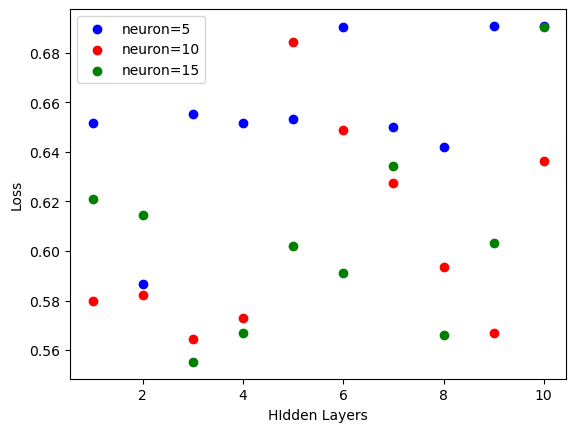

[0.6515727639198303, 0.5866639018058777, 0.6554192304611206, 0.6515476703643799, 0.6530188918113708, 0.6902503371238708, 0.6500072479248047, 0.6418786644935608, 0.6906289458274841, 0.6907546520233154]
[0.5796726942062378, 0.5824112296104431, 0.5644353628158569, 0.5727626085281372, 0.6844196319580078, 0.6489644646644592, 0.6275237202644348, 0.5934621691703796, 0.5667896866798401, 0.6362775564193726]
[0.6210130453109741, 0.6145344972610474, 0.5552312731742859, 0.566909670829773, 0.6019022464752197, 0.5909478664398193, 0.6342706084251404, 0.566011905670166, 0.6032663583755493, 0.6902809143066406]


In [23]:
plt.scatter(num_layers, scores2_5, c='b')
plt.scatter(num_layers, scores2_10, c='r')
plt.scatter(num_layers, scores2_15, c='g')
plt.legend(['neuron=5', 'neuron=10', 'neuron=15'])
plt.xlabel('HIdden Layers')
plt.ylabel('Loss')
plt.show()

print(scores2_5)
print(scores2_10)
print(scores2_15)

### Result of 2-B:
- 15-neuron model with 3 hidden layers is the optimal configuration (Loss = 0.5552..)

## 2-C. Find optimal activate function

- repeat the same process as assignment 1 (1-E)

In [24]:
# define four activate functions as 'activate_functions'
activate_functions = ['tanh', 'relu', 'sigmoid', 'softplus']

# define 'scores2_af' for scores of activate functions in assignment 2
scores2_af = []

# use 'for' loop to acquire score for each function
for af in activate_functions:

    # generate the optimal sequential model(15-neuron, 3 hidden layers) for each activate function.
    model = Sequential()
    model.add(Dense(15, input_dim=11, activation=af))
    model.add(Dense(15, activation=af))
    model.add(Dense(15, activation=af))
    model.add(Dense(15, activation=af))
    
    # keep activation function of the output layer as 'sigmoid'
    model.add(Dense(1, activation='sigmoid'))
    
    # compile and fit
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    model.fit(X, Y, batch_size=10, epochs=200)

    score = model.evaluate(X, Y)    
    scores2_af.append(score)
    print(len(model.layers), scores2_af)

Epoch 1/200
160/160 [==============================] - 3s 3ms/step - loss: 0.6746
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6598
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6558
Epoch 4/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6524
Epoch 5/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6549
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6546
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6524
Epoch 8/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6459
Epoch 9/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6540
Epoch 10/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6440
Epoch 11/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6478
Epoch 12/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6457
Epoch 13/200


160/160 [==============================] - 0s 2ms/step - loss: 0.6769
Epoch 100/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6336
Epoch 101/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6353
Epoch 102/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6465
Epoch 103/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6361
Epoch 104/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6373
Epoch 105/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6262
Epoch 106/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6347
Epoch 107/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6311
Epoch 108/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6343
Epoch 109/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6212
Epoch 110/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6189
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.6062
Epoch 197/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6191
Epoch 198/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6020
Epoch 199/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6083
Epoch 200/200
50/50 [==============================] - 0s 2ms/step - loss: 0.5924
5 [0.5924168825149536]
Epoch 1/200
160/160 [==============================] - 2s 3ms/step - loss: 0.7184
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6544
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6494
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6473
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6465
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6475
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6437

160/160 [==============================] - 0s 2ms/step - loss: 0.5899
Epoch 94/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5800
Epoch 95/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5929
Epoch 96/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5860
Epoch 97/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5811
Epoch 98/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5846
Epoch 99/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5857
Epoch 100/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5804
Epoch 101/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5788
Epoch 102/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5793
Epoch 103/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5776
Epoch 104/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5772
Epoch 105/20

160/160 [==============================] - 0s 2ms/step - loss: 0.5626
Epoch 191/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5570
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5605
Epoch 193/200
160/160 [==============================] - 1s 4ms/step - loss: 0.5618
Epoch 194/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5605
Epoch 195/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5532
Epoch 196/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5616
Epoch 197/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5575
Epoch 198/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5534
Epoch 199/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5475
Epoch 200/200
50/50 [==============================] - 1s 4ms/step - loss: 0.5362
5 [0.5924168825149536, 0.5362298488616943]
Epoch 1/200
160/160 [============================

160/160 [==============================] - 0s 2ms/step - loss: 0.6896
Epoch 88/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6897
Epoch 89/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6892
Epoch 90/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6896
Epoch 91/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6894
Epoch 92/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6896
Epoch 93/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6894
Epoch 94/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6895
Epoch 95/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6893
Epoch 96/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6895
Epoch 97/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6893
Epoch 98/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6891
Epoch 99/200
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.6788
Epoch 185/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6779
Epoch 186/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6785
Epoch 187/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6778
Epoch 188/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6775
Epoch 189/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6769
Epoch 190/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6764
Epoch 191/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6762
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6759
Epoch 193/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6754
Epoch 194/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6749
Epoch 195/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6745
Epoch 

160/160 [==============================] - 0s 3ms/step - loss: 0.5827
Epoch 82/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5853
Epoch 83/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5918
Epoch 84/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5748
Epoch 85/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5852
Epoch 86/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5828
Epoch 87/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5856
Epoch 88/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5875
Epoch 89/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5884
Epoch 90/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5803
Epoch 91/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5808
Epoch 92/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5805
Epoch 93/200
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.5600
Epoch 179/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5597
Epoch 180/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5604
Epoch 181/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5592
Epoch 182/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5643
Epoch 183/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5635
Epoch 184/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5567
Epoch 185/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5588
Epoch 186/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5561
Epoch 187/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5589
Epoch 188/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5548
Epoch 189/200
160/160 [==============================] - 0s 3ms/step - loss: 0.5643
Epoch 

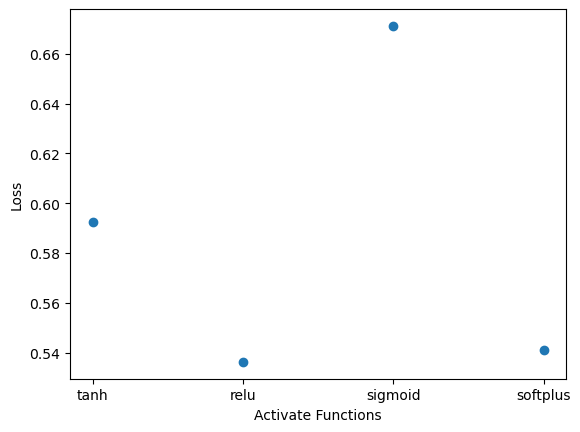

[0.5924168825149536, 0.5362298488616943, 0.6712279915809631, 0.541130542755127]


In [25]:
#Plot the result
plt.scatter(activate_functions, scores2_af)
plt.xlabel('Activate Functions')
plt.ylabel('Loss')
plt.show()

print(scores2_af)

### Result of 2-C:
- relu is the optimal activate function (Loss = 0.5362..)

## 2-D. Find optimal optimizer

- repeat the process as assignment 1 (1-F)

In [32]:
# because optimizer 'SGD', 'Adam', 'RMSprop' led to error, I imported legacy optimizers
# The error message was :'The optimizer cannot recognize variable dense_373/kernel:0

from keras.optimizers.legacy import SGD, Adam, RMSprop
from keras.optimizers import Lion

# define three new optimizers
sgd = SGD(learning_rate=0.1)
adam = Adam(learning_rate=0.1)
rmsprop = RMSprop(learning_rate=0.1)
lion = Lion(learning_rate=0.1)

In [33]:
# define four optimizers as 'activate_functions'

optimizers = [sgd, adam, rmsprop, lion]

# define 'scores2_op' for scores of optimizers in assignment 2
scores2_op = []

for op in optimizers:

   # generate the optimal sequential model (15-neuron, 3-hidden layer, activation = 'relu')
    model = Sequential()
    model.add(Dense(15, input_dim=11, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(15, activation='relu'))

    # keep activation function of the output layer as 'sigmoid'  
    model.add(Dense(1, activation= 'sigmoid'))

    # compile and fit for each optimizer
    model.compile(loss='binary_crossentropy', optimizer=op)
    model.fit(X, Y, batch_size=10, epochs=200)

    # generate scores
    score = model.evaluate(X, Y)    
    scores2_op.append(score)
    print(len(model.layers), scores2_op)

Epoch 1/200
160/160 [==============================] - 3s 3ms/step - loss: 0.7278
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6698
Epoch 3/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6636
Epoch 4/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6731
Epoch 5/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6656
Epoch 6/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6624
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6653
Epoch 8/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6533
Epoch 9/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6544
Epoch 10/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6570
Epoch 11/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6497
Epoch 12/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6529
Epoch 13/200


160/160 [==============================] - 0s 2ms/step - loss: 0.6467
Epoch 100/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6406
Epoch 101/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6378
Epoch 102/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6426
Epoch 103/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6424
Epoch 104/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6491
Epoch 105/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6372
Epoch 106/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6359
Epoch 107/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6519
Epoch 108/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6428
Epoch 109/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6309
Epoch 110/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6452
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.6160
Epoch 197/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6483
Epoch 198/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6194
Epoch 199/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6188
Epoch 200/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6379
5 [0.6378671526908875]
Epoch 1/200
160/160 [==============================] - 2s 2ms/step - loss: 0.8538
Epoch 2/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6924
Epoch 3/200
160/160 [==============================] - 1s 3ms/step - loss: 0.6947
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6950
Epoch 5/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6954
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6952
Epoch 7/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6964

160/160 [==============================] - 0s 3ms/step - loss: 0.6938
Epoch 94/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6952
Epoch 95/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 96/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6942
Epoch 97/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6950
Epoch 98/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 99/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 100/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6992
Epoch 101/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6940
Epoch 102/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6941
Epoch 103/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6936
Epoch 104/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6935
Epoch 105/20

160/160 [==============================] - 0s 2ms/step - loss: 0.6954
Epoch 191/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6967
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6954
Epoch 193/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6934
Epoch 194/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6957
Epoch 195/200
160/160 [==============================] - 0s 2ms/step - loss: 0.7005
Epoch 196/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6950
Epoch 197/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6952
Epoch 198/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6935
Epoch 199/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 200/200
50/50 [==============================] - 1s 2ms/step - loss: 0.6924
5 [0.6378671526908875, 0.6923683285713196]
Epoch 1/200
160/160 [============================

160/160 [==============================] - 0s 3ms/step - loss: 0.6950
Epoch 88/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6968
Epoch 89/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6943
Epoch 90/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6966
Epoch 91/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6905
Epoch 92/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6955
Epoch 93/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6938
Epoch 94/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6915
Epoch 95/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6951
Epoch 96/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6955
Epoch 97/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6933
Epoch 98/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6968
Epoch 99/200
160/

160/160 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 185/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6956
Epoch 186/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6963
Epoch 187/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 188/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6950
Epoch 189/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6940
Epoch 190/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 191/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 193/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6926
Epoch 194/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6942
Epoch 195/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6955
Epoch 

160/160 [==============================] - 0s 2ms/step - loss: 0.7009
Epoch 82/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6970
Epoch 83/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6955
Epoch 84/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 85/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6990
Epoch 86/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6972
Epoch 87/200
160/160 [==============================] - 0s 2ms/step - loss: 0.7001
Epoch 88/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6990
Epoch 89/200
160/160 [==============================] - 0s 2ms/step - loss: 0.7002
Epoch 90/200
160/160 [==============================] - 0s 2ms/step - loss: 0.7005
Epoch 91/200
160/160 [==============================] - 0s 2ms/step - loss: 0.7017
Epoch 92/200
160/160 [==============================] - 0s 2ms/step - loss: 0.7001
Epoch 93/200
160/

160/160 [==============================] - 0s 3ms/step - loss: 0.7000
Epoch 179/200
160/160 [==============================] - 0s 3ms/step - loss: 0.7015
Epoch 180/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6967
Epoch 181/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6977
Epoch 182/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6985
Epoch 183/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6998
Epoch 184/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6960
Epoch 185/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6995
Epoch 186/200
160/160 [==============================] - 0s 3ms/step - loss: 0.6947
Epoch 187/200
160/160 [==============================] - 0s 3ms/step - loss: 0.7001
Epoch 188/200
160/160 [==============================] - 0s 2ms/step - loss: 0.6917
Epoch 189/200
160/160 [==============================] - 0s 3ms/step - loss: 0.7013
Epoch 

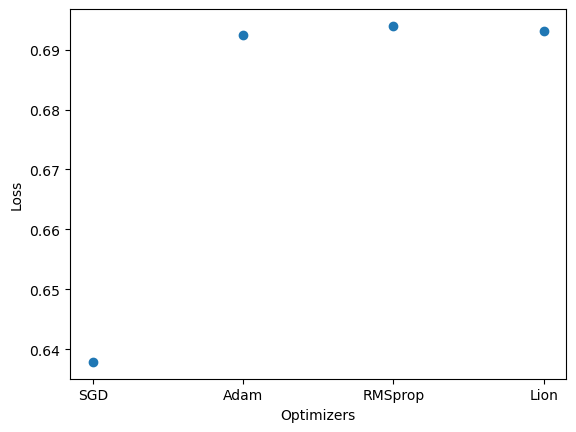

[0.6378671526908875, 0.6923683285713196, 0.6939593553543091, 0.6931474208831787]


In [34]:
#Plot the result
plt.scatter(['SGD', 'Adam', 'RMSprop', 'Lion'], scores2_op)
plt.xlabel('Optimizers')
plt.ylabel('Loss')
plt.show()

print(scores2_op)

### Result of 2-D:
- SGD is the best optimizer (Loss = 0.6379..)

## Overall Result : Optimal Configuration of Assignment 2 (Wine Quality Dataset)
- 15-neuron and 3 hidden layers
- 'relu' activation function
- 'SGD' optimizer